In [1]:
from ScriptFiles import DataCleaning_and_Prediction as dc
from ScriptFiles import DataRead_and_PreClean as dr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
 

In [2]:
#############################################################################
### Function to plot Data profile in terms of fuelvoltage, Distance over time

def plotData_profiles(df):
    plt.rcParams['figure.figsize'] = [16, 12]

    #### 1. Checking order of Data, as per datetime
    plt.subplot(3,1,1)
    plt.plot(df.index, df.datetime, 'g.', markersize=1, linewidth=1);

    plt.subplot(3,1,2)
    plt.plot(df.index, df.fuelVoltage, 'g.', markersize=2, linewidth=1);

    plt.subplot(3,1,3)
    plt.plot(df.index, df.distance, 'g-', markersize=2, linewidth=1);
    plt.title("Cumulative Distance vs Time", fontsize=15)
    plt.show()

In [3]:
#######################################################
### Function to Plot theft Points over Cleaned Data

def plot_theftpts(cleanedDf , theftpts=[], refPts=[], xlim=[], ylim1 = [], ylim2 = []):

    plt.rcParams['figure.figsize'] = [20, 4]
    # plt.subplot(6,1,1)
    fig, ax1 = plt.subplots()
    ax1.plot(cleanedDf.index, cleanedDf.fuelVoltage, 'g.', markersize=2, linewidth=1)
    ax1.set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('FuelVoltage', color='b')
    ax1.tick_params('y', colors='b')
    if len(ylim1)!=0:
        ax1.set_ylim(ylim1)

    ax2 = ax1.twinx()
    ax2.plot(cleanedDf.index, cleanedDf.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2)!=0:
        ax2.set_ylim(ylim2)
    plt.title("Initial Prediction theft Points - ZOOMED")
    if len(xlim) !=0:
        plt.xlim(xlim)
    
    for pt in theftpts:
        ax1.axvline(pt, color = 'black')
        
    for pt in refPts:
        ax1.axvline(pt, color = 'Red')
    plt.show()


In [4]:
def plot_Results(df, df_clean, result_df, theftpts=[], refPts=[], xlim = [], ylim1 = [], ylim2 = []):

    plt.rcParams['figure.figsize']=[16,12]
    fig, axi = plt.subplots(4, 1)
    axi[0].plot(df.datetime, df.fuelVoltage, 'g.', markersize=1, linewidth=1);
    #plt.plot(df.datetime, df.distance, 'b-', markersize=1, linewidth=1);
    axi[0].set_title('Original FuelData vs Time')
    axi[0].set_xlabel('time')

    axi[1].plot(df_clean.index, df_clean.fuelVoltage, 'g.', markersize=2, linewidth=1)
    axi[1].set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    axi[1].set_ylabel('FuelVoltage', color='b')
    axi[1].tick_params('y', colors='b')
    if len(ylim1) != 0:
        axi[1].set_ylim(ylim1)

    ax2 = axi[1].twinx()
    ax2.plot(df_clean.index, df_clean.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2) != 0:
        ax2.set_ylim(ylim2)
    if len(xlim) != 0:
        plt.xlim(xlim)
    axi[1].set_title('Cleaned Data')
        
    for pt in refPts:
        axi[1].axvline(pt, color = 'Red')
    
    
    
    axi[2].plot(df_clean.index, df_clean.fuelVoltage, 'g.', markersize=2, linewidth=1)
    axi[2].set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    axi[2].set_ylabel('FuelVoltage', color='b')
    axi[2].tick_params('y', colors='b')
    if len(ylim1)!=0:
        axi[2].set_ylim(ylim1)

    ax2 = axi[2].twinx()
    ax2.plot(df_clean.index, df_clean.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2)!=0:
        axi[2].set_ylim(ylim2)
        
    if len(xlim) !=0:
        plt.xlim(xlim)
    plt.title('Final Predicted Theft Pts - ZOOMED')

    for pt in result_df.theft_index:
        plt.axvline(pt, color = 'black')
        

    axi[3].plot(result_df.theft_index, result_df['fuel_VoltageJump'], 'g-', markersize=3, linewidth=1);
    axi[3].set_title('Fuel/km Ratio at Predicted theft pts - ZOOMED')
    
    axi[3].set_xlabel('time index')
    
    fig.tight_layout()

#     if len(xlim) !=0:
#         plt.xlim(xlim)
#     if len(ylim)!=0:
#         plt.ylim(ylim)

    #plt.plot(df_clean.index, df_clean.distance, 'b-', markersize=1, linewidth=1);

    plt.show()

In [5]:
def findMax_decayRate(cleanDf):

    i = 0
    dt = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())/500
    avgDT = []
    indexlst = []
    
    while i<len(cleanDf): 
        df = 0
        dfRef = cleanDf.fuelVoltage[i]
        dsRef = cleanDf.distance[i]
        while (df<=dt  and i<len(cleanDf)):
            df = dfRef - cleanDf.fuelVoltage[i] 
            if df <0 :
                dfRef = cleanDf.fuelVoltage[i]
            i+=1
            #print(i)

        if i<len(cleanDf):
            ds = cleanDf.distance[i] - dsRef
            if df>0 :
                #print (i)
                if ds==0:
                    ds = df/1000
                    #print("df = ",df,"****",i)
                avg = df/ds
                avgDT.append(avg)
                indexlst.append(cleanDf.index[i])

        med = pd.Series(avgDT).median()
        mean = pd.Series(avgDT).mean()
        avg = pd.Series(avgDT)
        max_dCRate = avg.median()+ 3*(abs(avg - avg.median()).median())
        
    return pd.Series(avgDT), indexlst, 1000*max_dCRate


In [6]:
#####################################################################
### Function to generate FuelMaxVoltage & FuelMinVoltage, to be sent
### to the main devices database for records.
def Gen_FuelMaxMin(df):
    df = dr.perform_PreFormating(df)
    dff, dff2 = dr.perform_postFormating(df)

    fmax = dff.fuelVoltage.max()
    fmin = dff.fuelVoltage.min()

    df_clean = dc.Clean_NoiseData(dff, 6, fmax, fmin)

    return df_clean.fuelVoltage.max(), df_clean.fuelVoltage.min()

In [7]:
folderpath = r"G:\Analytics\FuelAnalysis\test2"
savePath = r"G:\Analytics\FuelAnalysis\results"
filepath = r""

df_list, filesname = dr.read__MultipleCSVs(folder_path= folderpath, nfiles=8)
ctr = 0
def formatDf(df):
    #df_list[0].info()
    df = dr.perform_PreFormating(df)
    print ("Dataset_"+str(ctr+1) +" Preformatting Done")

    dff, dff2 = dr.perform_postFormating(df)
    print("Dataset_" + str(ctr + 1) + " Postformatting Done")
    return dff,dff2

def cleanDF(dff, fuelMax, fuelMin):
    df_clean = dc.Clean_NoiseData(dff, 6, fuelMax, fuelMin)
    print("Dataset_" + str(ctr + 1) + " Data Cleaning Done")
    return df_clean

def findtheft(df_clean, lvl, fuelMax, fuelMin):
    theft_pts, refpts = dc.jump_point(df_clean, lvl, fuelMax, fuelMin)
    print("Dataset_" + str(ctr + 1) + " Theft & Refuel points Indentified")
    return theft_pts, refpts

    

G:\Analytics\FuelAnalysis\test2\cordinates_007042639339.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042640749.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042641148.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042644259.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042647584.csv


C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


G:\Analytics\FuelAnalysis\test2\cordinates_007042648443.csv
G:\Analytics\FuelAnalysis\test2\cordinates_008527256951.csv
G:\Analytics\FuelAnalysis\test2\cordinates_008527904085.csv


In [8]:
#plotData_profiles(df)
df = df_list[3]
df = df[:]
df = df.reset_index(drop= True)
df.st = df.io_state.apply(lambda x: x[1])
dis = df[df.st == '0'].distance.apply(lambda x: int(x))

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


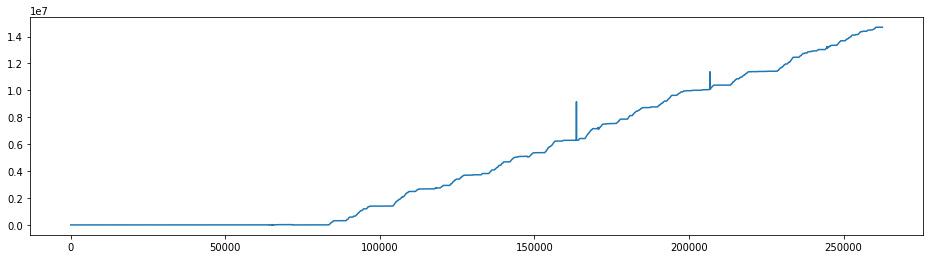

In [9]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dis)

In [10]:
fuelMax, fuelMin = Gen_FuelMaxMin(df)

262623
48797
48797
46612
46612
46612
46612


C:\Users\manje_000\Google Drive\Data Science\Loconav\ScriptFiles\DataCleaning_and_Prediction.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfClean['fuelVoltage_Percent'] = dfClean.fuelVoltage.apply(lambda x: round((100*x/(fuelMax - fuelMin)),2))


In [11]:
fuelMax, fuelMin

(560.0, 286.0)

In [12]:
dff, dff2 = formatDf(df.copy())
Dmax = dff.distance.max()

Dataset_1 Preformatting Done
262623
48797
48797
46612
46612
46612
46612
Dataset_1 Postformatting Done


In [13]:
df = dr.perform_PreFormating(df)

In [14]:
d = df[df.dev_state=='0']
len(d[d.fuelVoltage <= 10])

211891

In [15]:
len(df[df.dev_state=='0'])

213826

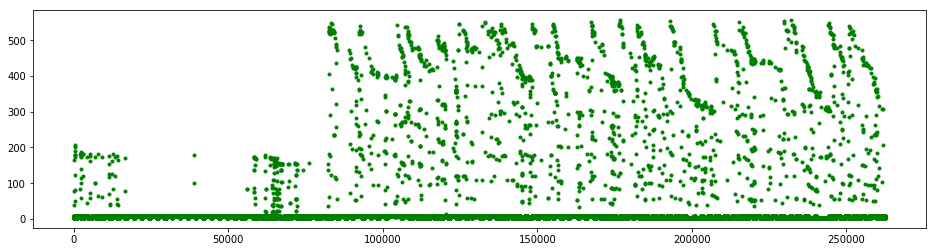

In [19]:
plt.plot(df[df.dev_state=='0'].index, df[df.dev_state=='0'].fuelVoltage, 'g.')

In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46612 entries, 0 to 46611
Data columns (total 17 columns):
lat             46612 non-null object
long            46612 non-null object
created_at      46612 non-null object
updated_at      0 non-null float64
device_id       46612 non-null int64
speed           46612 non-null float64
orientation     46612 non-null float64
distance        46612 non-null float64
received_at     46612 non-null object
io_state        46612 non-null object
availability    46612 non-null object
blnk            0 non-null float64
id              38021 non-null float64
dev_state       46612 non-null int64
FuelVoltage     46612 non-null int64
datetime        46612 non-null datetime64[ns]
fuelVoltage     46612 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(6)
memory usage: 6.0+ MB


In [18]:
len(dff), len(dff2)

(46612, 262623)

In [ ]:
a=[1,2,3,4,5,6]
a[0]

In [20]:
 dff3 = dff2[dff2.fuelVoltage<=200]

In [21]:
dff.loc[0,'datetime'] - dff.loc[len(dff)-1,'datetime']

Timedelta('-70 days +20:39:21')

In [22]:
dff2.loc[0,'datetime'] - dff2.loc[len(dff2)-1,'datetime']

Timedelta('-122 days +21:23:54')

In [23]:
dff2.loc[0,'datetime'] - dff.loc[0,'datetime']

Timedelta('-52 days +00:44:33')

In [24]:
dff2.loc[0,'datetime'] - dff.datetime.min()

Timedelta('-52 days +00:44:33')

In [ ]:
timeDiff = dff2.datetime.shift(-1) - dff2.datetime 

In [ ]:
dff2.datetime[:10]

In [ ]:
dff2.datetime.shift(-1)[:10]

In [ ]:
dff.datetime[0]

In [ ]:
timeDiff[timeDiff > pd.Timedelta('0.05 day')]

In [ ]:
timeDiff[timeDiff > pd.Timedelta('2 day')].index[-1]

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dff2[dff2.datetime<=dff.datetime.min()].index, dff2[dff2.datetime<=dff.datetime.min()].fuelVoltage,'g.', markersize = 1);
#plt.xlim(0,20000)
(dff3.fuelVoltage.min())


In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dff.distance*0.001, dff.fuelVoltage, 'g.', markersize = 2)

In [ ]:
dff.fuelVoltage.median()

In [ ]:
dff.fuelVoltage.std()

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.hist(dff.fuelVoltage,200);
#plt.xlim(0,0.02)
#plt.ylim(0,2.5)

In [ ]:
import matplotlib.mlab as mlab
mu = dff.fuelVoltage.mean()
#variance = (dff.fuelVoltage.std())*(dff.fuelVoltage.std())
sigma = dff.fuelVoltage.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

In [ ]:
cleandt = []
fueldt = dff.fuelVoltage
for i in range(len(dff)):
    try:
        cleandt.append(fueldt[i-20:i+20].mean())
    except:
        pass


In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dff.distance, dff.speed,  'g.', markersize = 1)

In [ ]:
def jump_point2(dff,m, level = 0.05, fuelMax=100, fuelMin=0):
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
    d = np.array(dff.distance)
    
    #######################################################################
    ## No. of Neighbourhood pts , dependent on sampling Rate of IoT device
    ## Criteria Set = Avg No. of points inside 10Km window will be considered
    n = int(10000/(dff.distance.max()/len(dff)))
    
    level = level*(fuelMax - fuelMin)
    theft_pts = []
    refpts = []
    rctr = 0
    ctr = 0
    i = 0
    dd1 = [0]
    disback = []
    disfor = []

    dd2 = [y[1] - y[0]]
    for i in range(1, len(x)):
        try:
            #             d1 =abs(y[i+1] - y[i])
            #             d2 =abs(y[i+2] - y[i])
            d_forward = (y[i + 1:i + n] - y[i])
            d_backward = (y[i + 1] - y[i - n:i])
            disfor.append(d[i + n] - d[i])
            disback.append(d[i] - d[i-n])
            # print (d_backward)
            
        except:
            pass
            #print("**")
        # dd1.append(d1)
        # dd2.append(d2)
        # if (d1 >= 0.05) & (d2 >= 0.05)&(d3 >= 0.05)&(d4 >= 0.05)&(d5 >= 0.05)&(d5 >= 0.05):

        ###########################################################################
        #### Finding probable refueling Points
        if ((sum(d_forward > 1 * 3 * level) in list(range(n-1, n+1)))):  # & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward > 1 * 3 * level) in list(range(n-1, n+1))):
                refpts.append(dff.index[i])
                rctr += 1

        ############################################################################
        #### Finding probable theft points
        if ((sum(d_forward < -1 * level) in list(range(n-1, n+1)))):  # & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward < -1 * level) in list(range(n-1, n+1))):
                theft_pts.append(dff.index[i])
                ctr += 1
                # print(theft_pts, ctr)

        if (ctr >= 2):
            if ((theft_pts[ctr - 1] - theft_pts[ctr - 2]) in list(range(1, 6))):
                theft_pts.pop(ctr - 2)
                ctr -= 1
                # print (i)

                # dd1.append(0)
                # dd2.append(0)
    # dff['dd1'] = pd.Series(dd1)
    # dff['dd2'] = pd.Series(dd2)
    print(len(theft_pts))
    return theft_pts, refpts, disback, disfor

In [ ]:
df_clean = cleanDF(dff.copy(), fuelMax, fuelMin)

In [ ]:
theft_pts, refpts = findtheft(df_clean, 0.01, fuelMax, fuelMin)

In [ ]:
from ipywidgets import *
from IPython.display import display
# w = IntSlider()
# display(w)

pred_lvl = dc.predit_MissingData(dff2,df_clean)


In [ ]:
dff2[dff2.datetime<=df_clean.datetime.min()]

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(pred_lvl.index, pred_lvl.predictFuelVolt,  'g.', markersize = 1)

In [ ]:
int(10000/(df_clean.distance.max()/len(df_clean)))

In [ ]:
xlim = [7800,8400]
ylim = [300, 450]
plot_theftpts(df_clean,refPts=[],theftpts=theft_pts,  xlim = xlim, ylim1= ylim)

In [ ]:
len(refpts)

In [ ]:
## Finding avgMax decay rate
avgDT, indexlst, max_dCRate = findMax_decayRate(df_clean)

In [ ]:
max_dCRate, avgDT.median(), round(avgDT.mean(),5)

In [ ]:
result_df = dc.generate_PredictTable(df_clean,theft_pts,max_dCRate, fuelMax, fuelMin)

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(result_df.theft_index, result_df['fuel_VoltageJump'], 'g-', markersize=3, linewidth=1);
#plt.ylim(0,400)

In [ ]:
#build_savePath = savePath + r"\result_dataset_" + filesname[ctr].replace(folderpath,"").replace('\\', "")
#result_df.to_csv(build_savePath)

plot_Results(dff,df_clean, result_df, theft_pts, refpts , xlim = xlim, ylim1=ylim);
#ctr+=1
print(result_df)

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df_clean.distance*0.001, df_clean.fuelVoltage, 'g.', markersize = 2)

In [ ]:
from scipy.fftpack import fft
from scipy import signal as sg
import statsmodels.api as sm
from scipy.signal import butter, lfilter, freqz
import datetime

In [ ]:
normdata = df_clean.fuelVoltage/df_clean.fuelVoltage.max()
yvolt = fft(df_clean.fuelVoltage/df_clean.fuelVoltage.max())

plt.rcParams['figure.figsize'] = [16,4]
plt.ylim(0,1000);
plt.plot(np.abs(yvolt[:]));
plt.rcParams['figure.figsize'] = [16,4]
plt.xscale('log')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (Hz, Log Scale)')
#plt.axvline((2.5, color = 'black')
plt.text(2.1,-50, "Cut-off", fontsize = 15);

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y

def butter_bandstop_filter(data, lowcut,highcut, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low,high], btype='bandstop', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y


In [ ]:
# Filter the data, and plot both the original and filtered signals.
fs = 500             # Sampling Frequency
order = 5             # Order of Filter
cutoff = 1          # Filter Cut-off Frequency

df = df_clean.copy()
# Calling Butterworth filter
y = df_clean.fuelVoltage.max() *(butter_lowpass_filter(normdata, cutoff, fs, order, ftype= False))
y1 = butter_bandstop_filter(normdata, 10,200,fs,order,False)
time = df.datetime

#Plotting Results
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4, 1,1)
#plt.plot(time, norm_data, 'b-', linewidth=1, label='Original Signal')
plt.plot(df.datetime[0:10000], df.fuelVoltage[0:10000], 'g.', markersize = 1, linewidth = 1)
plt.legend()
plt.grid()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
#plt.xlim(0,10000)
plt.title('Original Fuel Voltage', fontsize = 20)
#plt.ylim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))
#plt.axvline(60000, color = 'black')

plt.subplot(4, 1,2)
plt.plot(df.index, y, 'r.', markersize=1, label='Original Signal')
plt.legend()
#plt.xlim(0,10000)
plt.ylim(df_clean.fuelVoltage.min(), 1.05*df_clean.fuelVoltage.max())
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(4, 1,3)
plt.plot(df.index, df['distance'], label='Cumulative Distance - DateSorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

#df3 = df2.sort_values(by=['distance'], ascending=True);
plt.subplot(4, 1,4)
plt.plot(df.index, df['distance'], label='Cumulative Distance - Dist Sorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

#plt.xlim(pd.)

# plt.subplot(4, 1,1)
# plt.plot(df.datetime, y1, 'r-', linewidth=3, label='Fuel Voltage, filtered')
# plt.ylim(0,1)
plt.grid()
plt.legend()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Filtered Voltage', fontsize = 20)
plt.xlabel('Time [sec]',  fontsize = 14)


plt.tight_layout()


In [ ]:
def findAVG(cleanDf, Dmax):
    i = 0
    ds = 0
    df = 0
    dsRef = 0
    dt = 10000
    avgdt_lst = []
    mean_lst = []
    median_lst = []
    indexlst_lst = []
    ctr = 0
    df1 = 0
    print(Dmax)
    while dt < 30000:
        avgDT = []
        indexlst = []
        #print (dt)
        i=0
        while i<len(cleanDf): 
            ds = 0
            df1 = 0
            dsRef = cleanDf.distance[i]
            dfRef = cleanDf.fuelVoltage[i]
            while ((ds)<=dt  and i<len(cleanDf)):
                ds = (cleanDf.distance[i] - dsRef)
                i+=1
                #print(i)

            if i<len(cleanDf):
                df = dfRef- cleanDf.fuelVoltage[i]
                if df>0 :
                    avg = df/ds
                    avgDT.append(avg)
                    indexlst.append(cleanDf.index[i])
            
            #print(df)
        indexlst_lst.append(indexlst)
        avgdt_lst.append(avgDT)
        med = pd.Series(avgDT).median()
        mean = pd.Series(avgDT).mean()
        #print (med,mean,mode)

        median_lst.append(med)
        mean_lst.append(mean)
        ctr+=1
        dt += 1000
        print (dt)

        
    return [median_lst,mean_lst], avgdt_lst, indexlst_lst

central_DT, avgLst, indexlst = findAVG(df_clean, Dmax)

In [ ]:
len(df_clean), len(avgLst), len(indexlst)

In [ ]:
#dt = [i*100 for (i,dt) in zip(len(central_DT[0]),Dmax) ]
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.hist(central_DT[0],bins =100);
plt.grid()
plt.axvline(pd.Series(central_DT[0]).mean(), color = 'black')
plt.axvline(pd.Series(central_DT[0]).median(), color = 'yellow')
plt.axvline(pd.Series(central_DT[0]).median() + 2*pd.Series(central_DT[0]).std(), color = 'Red')

#plt.ylim(0,.005)
plt.subplot(3,1,2)
plt.plot(central_DT[1]);
plt.ylim(0,.001)
plt.grid()
plt.title("Median dF/dS vs Increasing Ds")

#plt.plot(central_DT[2]);

        

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.plot(avgLst[1],'b-');
plt.grid()
#plt.ylim(0,.4)

plt.axhline(pd.Series(avgLst[1]).mean(), color = 'black')
plt.axhline(pd.Series(avgLst[1]).median(), color = 'green')
plt.axhline(2*pd.Series(avgLst[1]).std(), color = 'Red')
#plt.xlim(0,500)
plt.subplot(3,1,2)
plt.plot(avgLst[0], 'b-');
plt.axhline(pd.Series(avgLst[0]).mean(), color = 'black')
plt.axhline(pd.Series(avgLst[0]).median(), color = 'green')
plt.axhline(2*pd.Series(avgLst[0]).std(), color = 'Red')

#plt.ylim(0,.4)
plt.grid()

In [ ]:
(indexlst[0])

In [ ]:
plt.hist(avgLst[1][abs(avgLst[1] - avgLst[1].mean()) < 3*avgLst[1].std()],bins = 200)
plt.axvline(avgLst[1].median(), color = 'black')
plt.axvline(avgLst[1].mean(), color = 'green')

In [ ]:
from ipywidgets import *
from IPython.display import display
# w = IntSlider()
# display(w)
def f(x):
    return x
interact(f, x= IntSlider(min=-10, max=30, step=1,value=1));

In [ ]:
def f(x):    
    index = indexlst[x]
    avg = avgLst[x]
    plt.rcParams['figure.figsize'] = [16,4]
    plt.plot(index, avg, 'g.', markersize = 2)
    plt.axhline(pd.Series(avg).median(), color = 'red')
    plt.axhline(pd.Series(avg).mean(), color = 'blue')
    plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
    plt.ylim(0,0.002)

interact(f, x= IntSlider(min=0, max=20, step=1,value=10));

In [ ]:
def findAVG2(cleanDf, Dmax):
    i = 0
    ds = 0
    df = 0
    dsRef = 0
    dt = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())/500
    dtmax = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())/50
    avgdt_lst = []
    mean_lst = []
    median_lst = []
    indexlst_lst = []
    ctr = 0
    df1 = 0
    print(Dmax, dt, dtmax)
    while dt < dtmax:
        avgDT = []
        indexlst = []
        print ("dt = ",dt)
        i=0
        while i<len(cleanDf): 
            df = 0
            dfRef = cleanDf.fuelVoltage[i]
            dsRef = cleanDf.distance[i]
            while (df<=dt  and i<len(cleanDf)):
                df = dfRef - cleanDf.fuelVoltage[i] 
                if df <0 :
                    dfRef = cleanDf.fuelVoltage[i]
                i+=1
                #print(i)
            
            if i<len(cleanDf):
                ds = cleanDf.distance[i] - dsRef
                if df>0 :
                    #print (i)
                    if ds==0:
                        ds = df/1000
                        print("df = ",df,"****",i)
                    avg = df/ds
                    avgDT.append(avg)
                    indexlst.append(cleanDf.index[i])
            
        #print(avgDT)
        #print(dt)
        indexlst_lst.append(indexlst)
        if len(avgDT)!=0 :
            avgdt_lst.append(avgDT)
            med = pd.Series(avgDT).median()
            mean = pd.Series(avgDT).mean()
            #print (med,mean,mode)

            median_lst.append(med)
            mean_lst.append(mean)
        ctr+=1
        dt += dtmax/100
        #print (dt)

        
    return [median_lst,mean_lst], avgdt_lst, indexlst_lst

central_DT2, avgLst2, indexlst2 = findAVG2(df_clean, Dmax)

In [ ]:
def findMax_decayRate(cleanDf):

    i = 0
    dt = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())/500
    avgDT = []
    indexlst = []
    
    while i<len(cleanDf): 
        df = 0
        dfRef = cleanDf.fuelVoltage[i]
        dsRef = cleanDf.distance[i]
        while (df<=dt  and i<len(cleanDf)):
            df = dfRef - cleanDf.fuelVoltage[i] 
            if df <0 :
                dfRef = cleanDf.fuelVoltage[i]
            i+=1
            #print(i)

        if i<len(cleanDf):
            ds = cleanDf.distance[i] - dsRef
            if df>0 :
                #print (i)
                if ds==0:
                    ds = df/1000
                    #print("df = ",df,"****",i)
                avg = df/ds
                avgDT.append(avg)
                indexlst.append(cleanDf.index[i])

        med = pd.Series(avgDT).median()
        mean = pd.Series(avgDT).mean()
        avg = pd.Series(avgDT)
        max_dCRate = avg.median()+ 3*abs(avg - avg.median()).median()
        
    return pd.Series(avgDT), indexlst, max_dCRate

avgDT, indexlst, max_dCRate = findMax_decayRate(df_clean)

In [ ]:
len(df_clean), len(avgDT), len(indexlst), max_dCRate

In [ ]:
sum(avgDT==1000)

In [ ]:
#dt = [i*100 for (i,dt) in zip(len(central_DT[0]),Dmax) ]
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.hist(central_DT2[0],bins =100);
plt.grid()
plt.axvline(pd.Series(central_DT2[0]).mean(), color = 'black')
plt.axvline(pd.Series(central_DT2[0]).median(), color = 'yellow')
plt.axvline(pd.Series(central_DT2[0]).median() + 2*pd.Series(central_DT2[0]).std(), color = 'Red')
plt.title('Histogram plot for Average Median for Varying Windows size')

plt.subplot(3,1,2)
plt.hist(central_DT2[1],bins =1000);
plt.grid()
plt.axvline(pd.Series(central_DT2[1]).mean(), color = 'black')
plt.axvline(pd.Series(central_DT2[1]).median(), color = 'yellow')
plt.axvline(pd.Series(central_DT2[1]).median() + 2*pd.Series(central_DT2[1]).std(), color = 'Red')
plt.semilogx()
plt.semilogy()
plt.ylim(0,5000)
plt.title('Average Mean plot for Varying Windows size')

plt.subplot(3,1,3)
plt.plot(central_DT2[0]);
#plt.ylim(0,.002)
plt.grid()
plt.title("Median dF/dS vs Increasing Ds")

In [ ]:
def f2(x):
    return x
def f(x):    
    index = indexlst2[x]
    avg = avgLst2[x]
    avg = pd.Series(avg)
    plt.rcParams['figure.figsize'] = [16,8]
    interact(f2, x=str(pd.Series(avg).median()));
    interact(f2, x=str(pd.Series(avg).median()+ 3*abs(avg - avg.median()).median()));
    plt.subplot(2,1,1)
    plt.plot(index, avg, 'g.')
    plt.semilogy()
    plt.axhline(pd.Series(avg).median(), color = 'red')
    plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
    plt.axhline(pd.Series(avg).median()+ 4*abs(avg - avg.median()).median(), color = 'Blue')
    plt.axhline(pd.Series(avg).median()- 2*abs(avg - avg.median()).median(), color = 'Blue')
    abs(avg - avg.median()).median()
   # plt.ylim(0,0.05)
    plt.subplot(2,1,2)
    plt.plot(index,avg)
    plt.semilogy()
    plt.semilogx()
    #plt.ylim(0,0.1)
    #plt.axhline(pd.Series(avg).median(), color = 'red')
   # plt.axhline(pd.Series(avg).mean(), color = 'blue')
   ## plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
    
    
interact(f, x= IntSlider(min=0, max=200, step=1,value=0));


In [ ]:
IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [ ]:
 avg = pd.Series(avgLst2[0])
abs(avg - avg.median()).median()

In [ ]:
avg[avg!=1000].median(), avg[avg!=1000].std()

In [ ]:
meddev = []
for  avg in avgLst2:
    avg = pd.Series(avg)
    meddev.append(pd.Series(avg).median()+ 2*abs(avg - avg.median()).median())
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(meddev)
plt.axhline(pd.Series(meddev).median(), color = 'red')
plt.axhline(pd.Series(meddev).mean(), color = 'Black')
plt.xlim(0,100)

In [ ]:
pd.Series(meddev).mean(), max(meddev)

In [ ]:
a = avgDT.value_counts()
avgDT.median(), avgDT.mean(), avgDT.mode()

10km:
mean = 0.0167
median = 0.0131
mode = 0.0037

1km:
mean = 0.0095
median = 0.00562
mode = 0.00187

5km:
mean = 0.00138
median = 0.00936
mode = 0.00187

0.5Km
mean = 0.00138
median = 0.00936
mode = 0.00187

50km
mean = 0.0373
median = 0.0365
mode = 0.0411

100km
mean = 0.065988
median = 0.0692
mode = 0.048689









In [ ]:
plt.plot(df_clean.distance * .001*Dmax, df_clean.fuelVoltage,  'g.')